## EDA Students

In [ ]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-

In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [2]:
data_df = pd.read_csv('./asp/StudentsPerformance.csv') #fetch data from file
data_df.head() #check first five record
#we have a combination of categorical and num data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data_df.info() #check is there any missing value or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data_df.describe() #pick only numerical value

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
for col in data_df.columns: #take columns from list
    print (f'[{col}]:{data_df[col].unique()}') #give unique values in all columns

[gender]:['female' 'male']
[race/ethnicity]:['group B' 'group C' 'group A' 'group D' 'group E']
[parental level of education]:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
[lunch]:['standard' 'free/reduced']
[test preparation course]:['none' 'completed']
[math score]:[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
[reading score]:[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
[writing score]:[ 74  88  93 

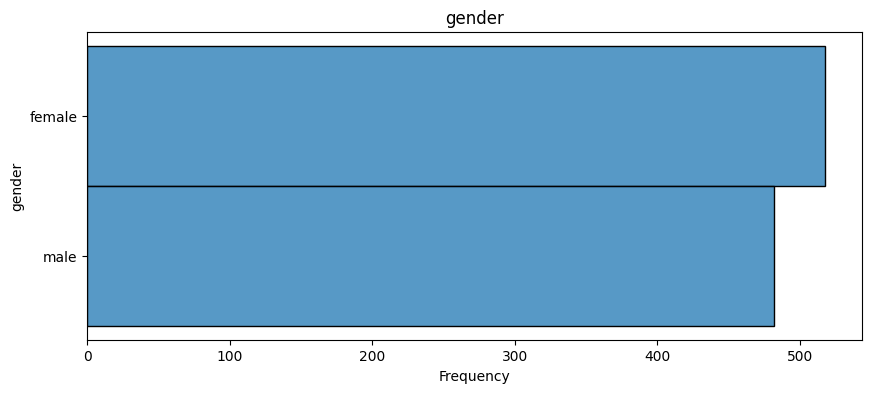

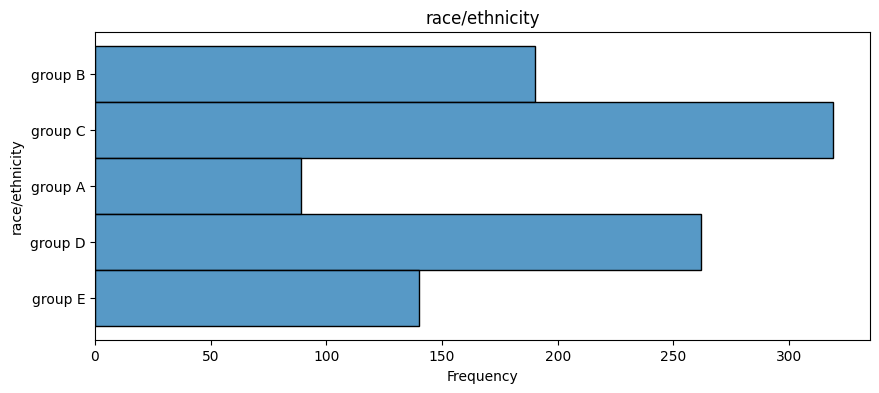

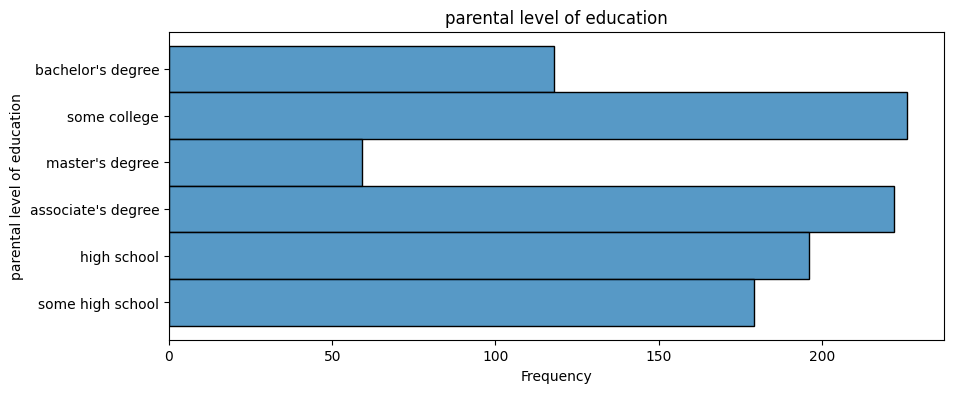

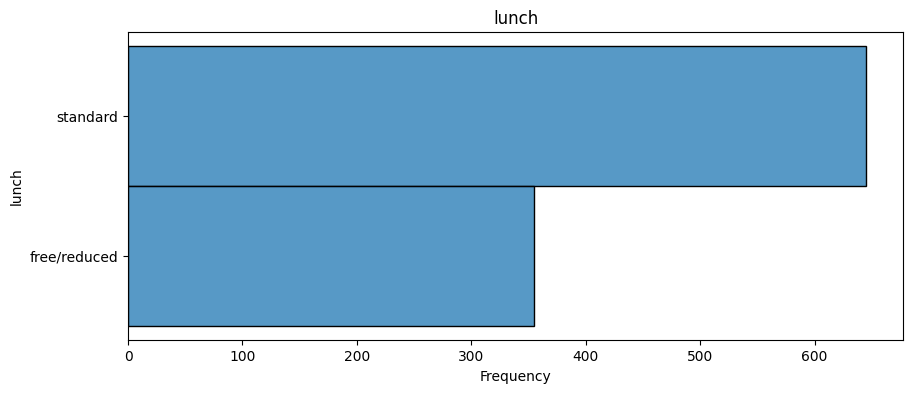

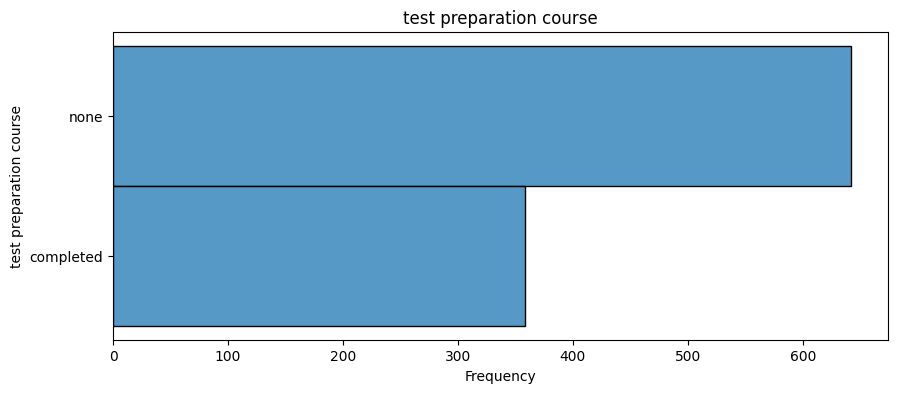

In [6]:
cat_cols = ['gender','race/ethnicity','parental level of education',
            'lunch','test preparation course']

for count,col in enumerate(cat_cols):
    
    fig,ax = plt.subplots(figsize = (10,4)) 
    
    colCount = data_df[col].value_counts()
    
    ax.set_title(col)
    ax.set_xlabel('Frequency')
    sns.histplot(data=data_df,y=col,ax=ax)

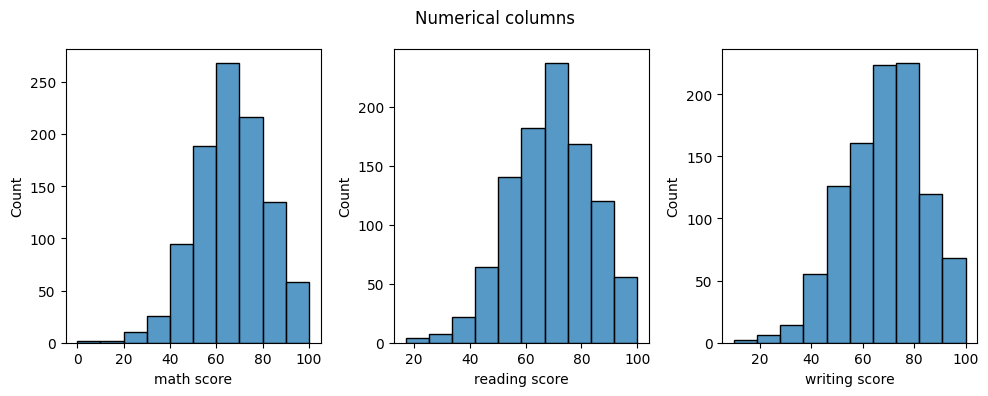

In [7]:
num_cols = ['math score','reading score','writing score']

fig,axes = plt.subplots(1, 3, figsize =(10,4)) #subplot give two values figure and access 1row and 3 col

for count, col in enumerate(num_cols):
    ax = axes[count]
    sns.histplot(data = data_df, x = col, ax = ax, bins = 10)
fig.suptitle('Numerical columns')
plt.tight_layout()

## is there any variation by cat variables?

In [8]:
data_df[['gender', 'math score']].groupby(['gender'],
                                          as_index=False).mean().round(2)

,gender,math score
0,female,63.63
1,male,68.73


<Axes: >

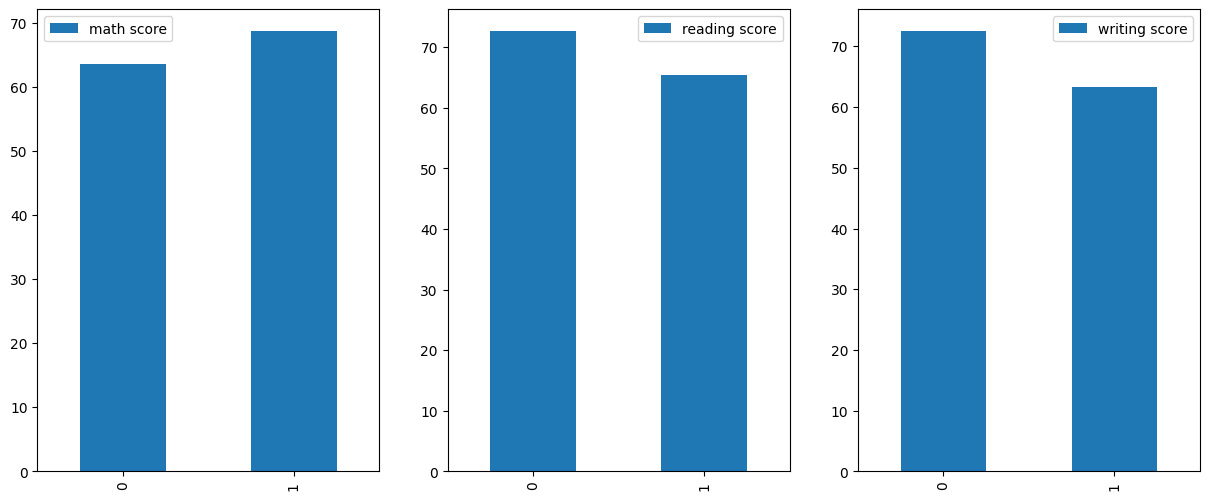

In [9]:
fig, axes = plt.subplots(1,3,figsize = (15,6))
data_df[['gender', 'math score']].groupby(['gender'],
                                          as_index = False).mean().plot(kind = 'bar',
                                                                      ax = axes[0])
data_df[['gender', 'reading score']].groupby(['gender'],
                                          as_index = False).mean().plot(kind = 'bar',
                                                                      ax = axes[1])
                                          
data_df[['gender', 'writing score']].groupby(['gender'],
                                          as_index = False).mean().plot(kind = 'bar',
                                                                      ax = axes[2])

<Axes: >

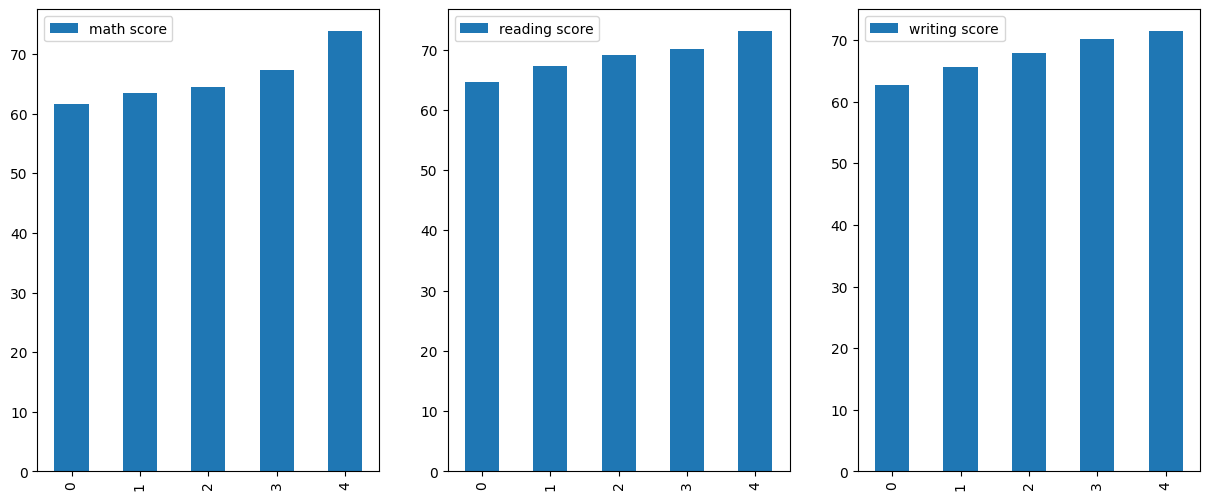

In [10]:
fig, axes = plt.subplots(1,3,figsize = (15,6))

col = 'race/ethnicity'

data_df[[col, 'math score']].groupby([col],
                                          as_index = False).mean().plot(kind = 'bar',
                                                                      ax = axes[0])

data_df[[col, 'reading score']].groupby([col],
                                          as_index = False).mean().plot(kind = 'bar',
                                                                      ax = axes[1])
                                          

data_df[[col, 'writing score']].groupby([col],
                                          as_index = False).mean().plot(kind = 'bar',
                                                                      ax = axes[2])

Text(0.5, 0.98, 'parental level of education columns')

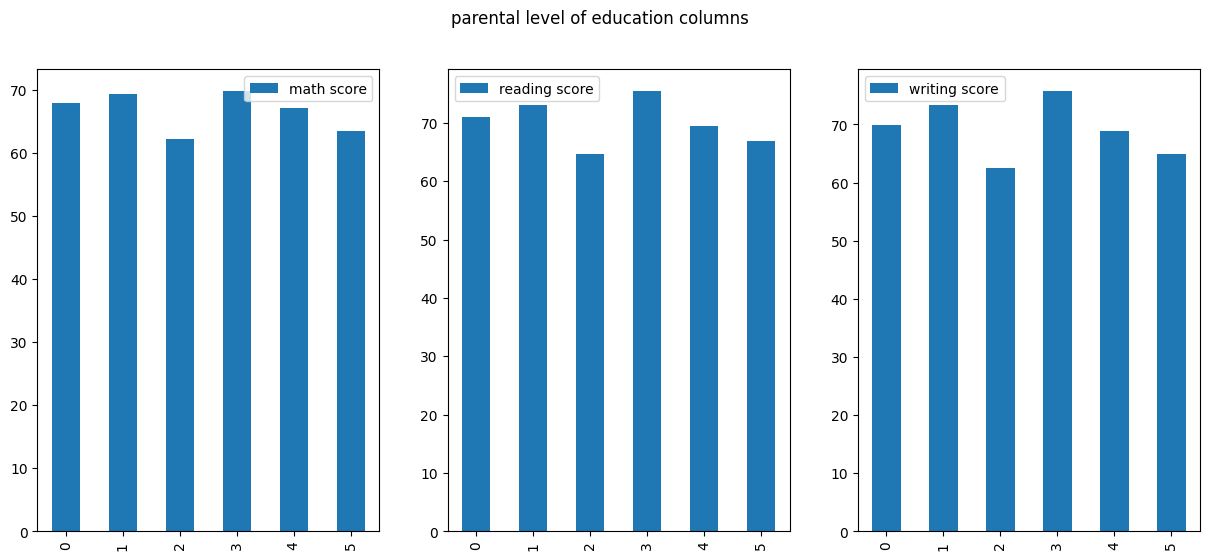

In [11]:
fig, axes = plt.subplots(1,3,figsize = (15,6))

col = 'parental level of education'

data_df[[col, 'math score']].groupby([col],
                                          as_index = False).mean().plot(kind = 'bar',
                                                                      ax = axes[0])

data_df[[col, 'reading score']].groupby([col],
                                          as_index = False).mean().plot(kind = 'bar',
                                                                      ax = axes[1])
                                          

data_df[[col, 'writing score']].groupby([col],
                                          as_index = False).mean().plot(kind = 'bar',
                                                                      ax = axes[2])
                                          
fig.suptitle('parental level of education columns')

Text(0.5, 0.98, 'Lunch column')

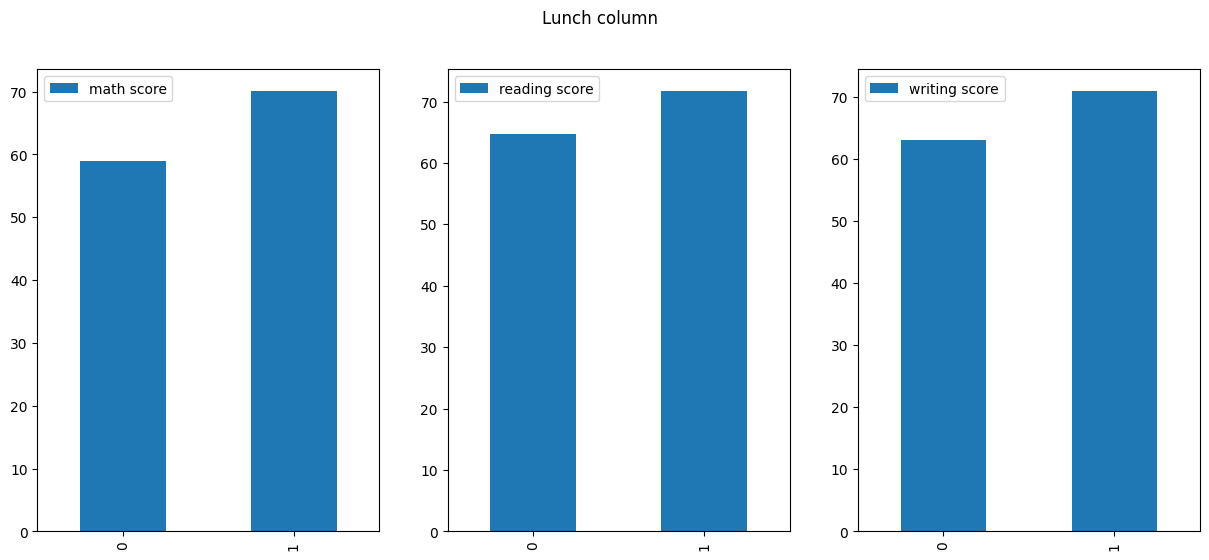

In [12]:
fig, axes = plt.subplots(1,3,figsize = (15,6))

col = 'lunch'

data_df[[col, 'math score']].groupby([col],
                                          as_index = False).mean().plot(kind = 'bar',
                                                                      ax = axes[0])

data_df[[col, 'reading score']].groupby([col],
                                          as_index = False).mean().plot(kind = 'bar',
                                                                      ax = axes[1])
                                          

data_df[[col, 'writing score']].groupby([col],
                                          as_index = False).mean().plot(kind = 'bar',
                                                                      ax = axes[2])

fig.suptitle('Lunch column')

Text(0.5, 0.98, 'test preparation course columns')

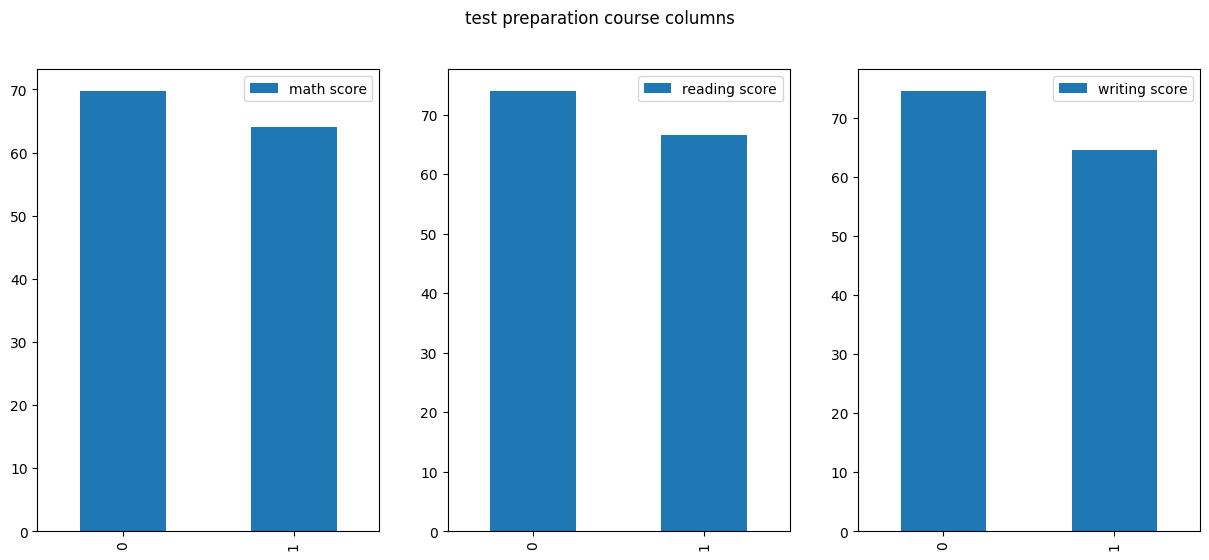

In [13]:
fig, axes = plt.subplots(1,3,figsize = (15,6))

col = 'test preparation course'

data_df[[col, 'math score']].groupby([col],
                                          as_index = False).mean().plot(kind = 'bar',
                                                                      ax = axes[0])

data_df[[col, 'reading score']].groupby([col],
                                          as_index = False).mean().plot(kind = 'bar',
                                                                      ax = axes[1])
                                          

data_df[[col, 'writing score']].groupby([col],
                                          as_index = False).mean().plot(kind = 'bar',
                                                                      ax = axes[2])
                                          
fig.suptitle('test preparation course columns')

<Axes: ylabel='writing score'>

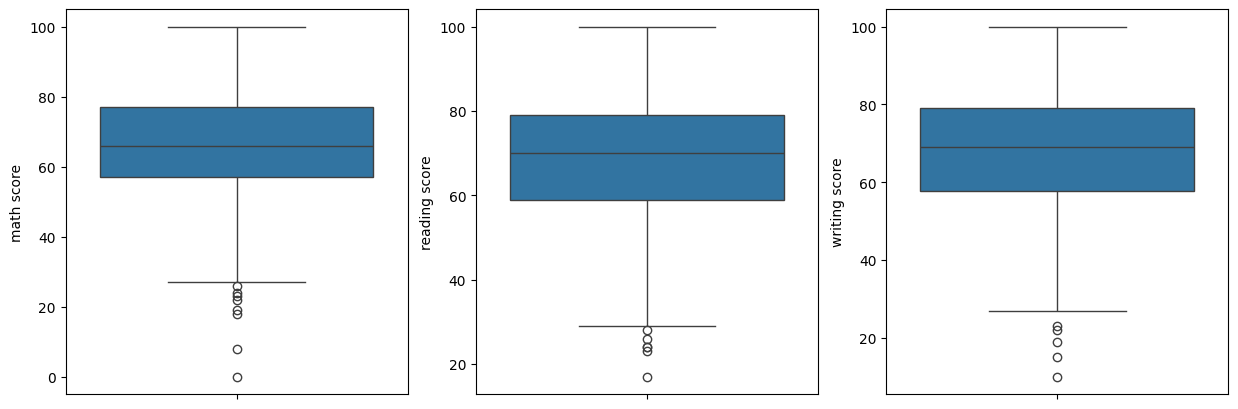

In [14]:
fig , axes = plt.subplots(1,3,figsize = (15,5))
sns.boxplot(data = data_df,y = 'math score', ax= axes[0])
sns.boxplot(data = data_df,y = 'reading score', ax= axes[1])
sns.boxplot(data = data_df,y = 'writing score', ax= axes[2])

In [15]:
out_list = []
# 1st Quartile
Q1 = np.percentile(data_df['math score'],25)

#3rd Quartile
Q3 = np.percentile(data_df['math score'],75)
IQR = Q3-Q1
ol_dis = IQR * 1.5 #whisker length
outlier = data_df[data_df['math score'] < Q1 - ol_dis].index
out_list.extend(outlier)
outlier


Index([17, 59, 145, 338, 466, 787, 842, 980], dtype='int64')

In [16]:
Q1 = np.percentile(data_df['reading score'],25)

#3rd Quartile
Q3 = np.percentile(data_df['reading score'],75)
IQR = Q3-Q1
ol_dis = IQR * 1.5 #whisker length
outlier = data_df[data_df['reading score'] < Q1 - ol_dis].index
out_list.extend(outlier)
outlier

Index([59, 76, 211, 327, 596, 980], dtype='int64')

In [17]:
Q1 = np.percentile(data_df['writing score'],25)

#3rd Quartile
Q3 = np.percentile(data_df['writing score'],75)
IQR = Q3-Q1
ol_dis = IQR * 1.5 #whisker length
outlier = data_df[data_df['writing score'] < Q1 - ol_dis].index
out_list.extend(outlier) #we are merging three columns reading ,writing and math score
outlier

Index([59, 76, 327, 596, 980], dtype='int64')

In [18]:
from collections import Counter
Counter(out_list) #check how many studnts good in subjects

Counter({59: 3,
         980: 3,
         76: 2,
         327: 2,
         596: 2,
         17: 1,
         145: 1,
         338: 1,
         466: 1,
         787: 1,
         842: 1,
         211: 1})

In [19]:
data_df.iloc[[59,980]]  #show indexes students scores

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
980,female,group B,high school,free/reduced,none,8,24,23


In [20]:
data_df['overall'] = (data_df['math score']+
                      data_df['reading score']+
                      data_df['writing score']) / 3.0

<Axes: xlabel='gender', ylabel='overall'>

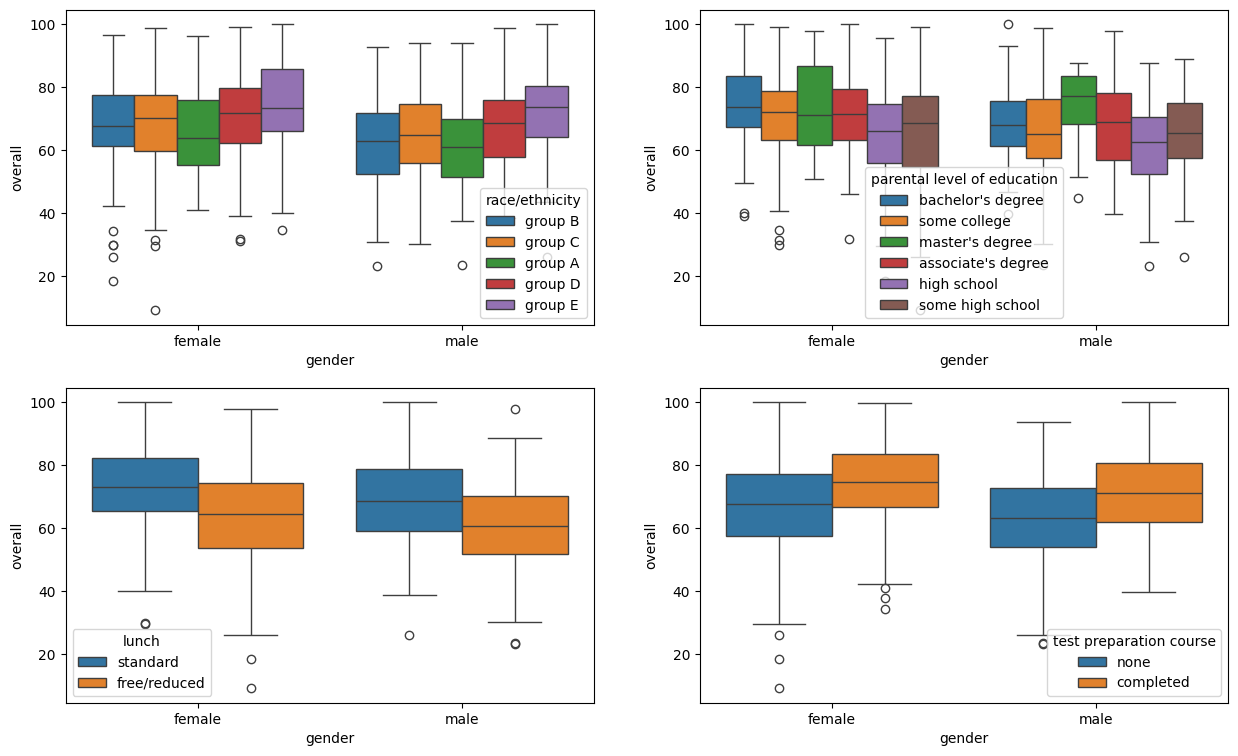

In [21]:
fig = plt.figure(figsize=(15,9))

ax = fig.add_subplot(221)  # two rows two coloum first axis 

sns.boxplot(data=data_df,
            y = 'overall',
            x = 'gender',
            hue=cat_cols[1],
            ax = ax)

ax = fig.add_subplot(222) 

sns.boxplot(data=data_df,
            y = 'overall',
            x = 'gender',
            hue =cat_cols[2],
            ax = ax)

ax = fig.add_subplot(223) 

sns.boxplot(data=data_df,
            y = 'overall',
            x = 'gender',
            hue=cat_cols[3],
            ax = ax)

ax = fig.add_subplot(224)
 
sns.boxplot(data=data_df,
            y = 'overall',
            x = 'gender',
            hue=cat_cols[4],
            ax = ax)

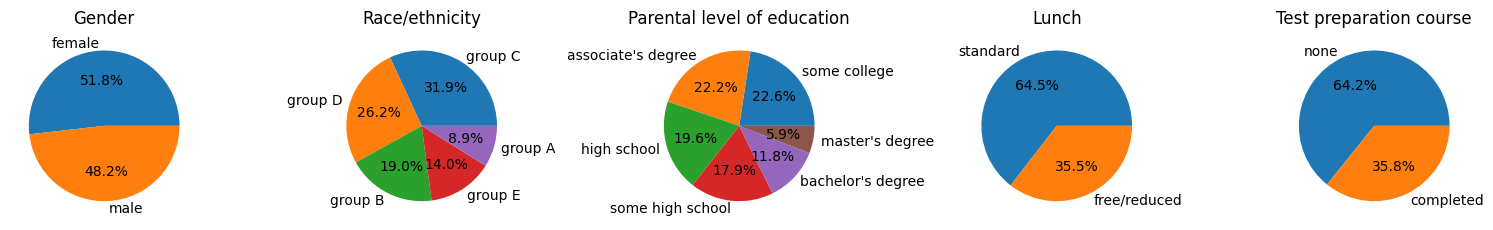

In [34]:
fig,axes = plt.subplots(1,5,figsize = (15,5))

for count,col in enumerate(cat_cols):
    ax = axes[count]
    data_df[col].value_counts().plot.pie(ax=ax,
                                         autopct = '%1.1f%%')
    ax.set_title(col.capitalize())
    ax.set_ylabel('')
    
plt.tight_layout() # to set data in proper mannaer

<Axes: xlabel='gender', ylabel='overall'>

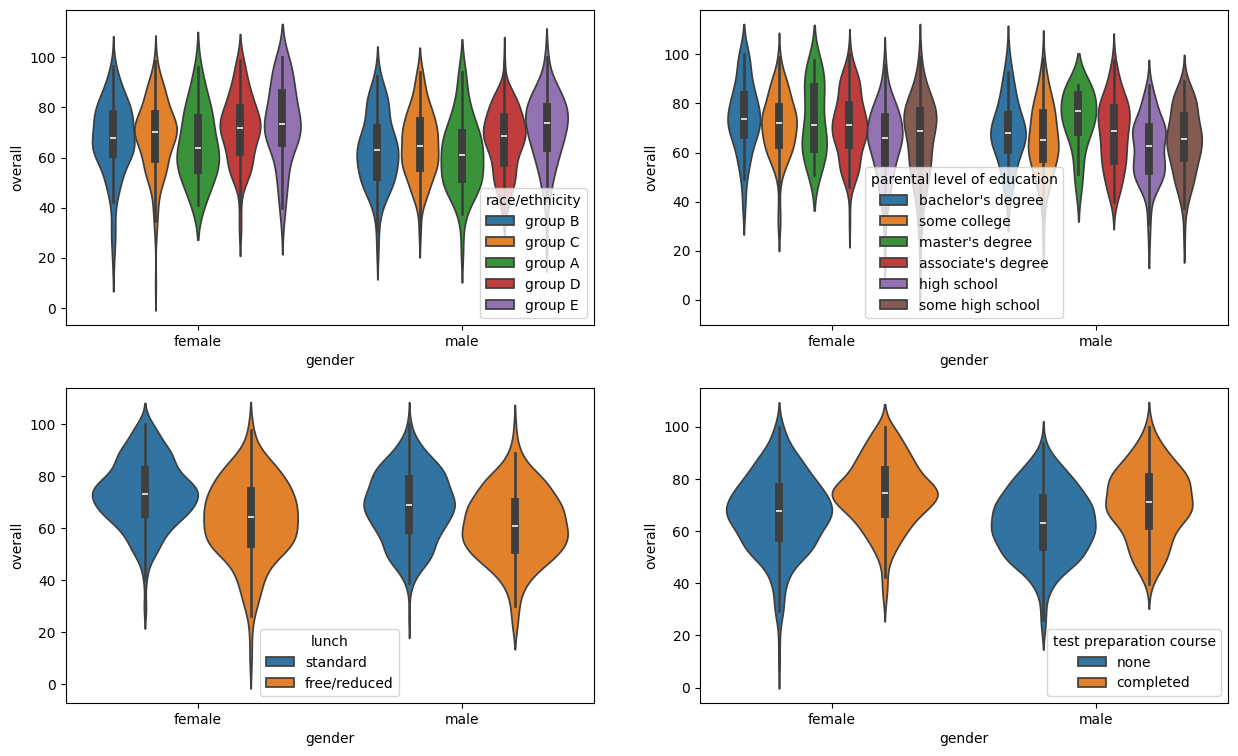

In [35]:
fig = plt.figure(figsize=(15,9))

ax = fig.add_subplot(221)  # two rows two coloum first axis 

sns.violinplot(data=data_df,
            y = 'overall',
            x = 'gender',
            hue=cat_cols[1],
            ax = ax)

ax = fig.add_subplot(222) 

sns.violinplot(data=data_df,
            y = 'overall',
            x = 'gender',
            hue =cat_cols[2],
            ax = ax)

ax = fig.add_subplot(223) 

sns.violinplot(data=data_df,
            y = 'overall',
            x = 'gender',
            hue=cat_cols[3],
            ax = ax)

ax = fig.add_subplot(224)
 
sns.violinplot(data=data_df,
            y = 'overall',
            x = 'gender',
            hue=cat_cols[4],
            ax = ax)

<Axes: >

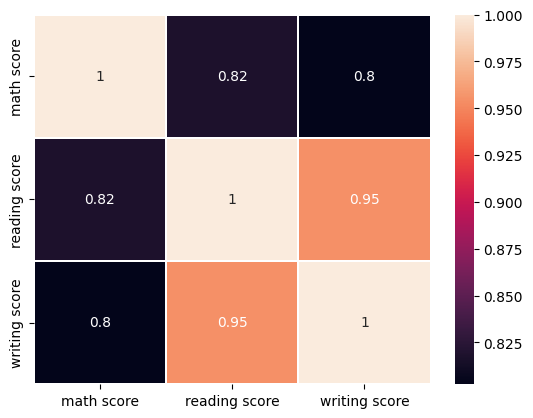

In [36]:
sns.heatmap(data_df[num_cols].corr(), annot = True, linewidths=0.2)